Logistic regression is a supervised learning ML algorithm used to predict categorical dependent variable  using a 
given set of indepenedent variabales. Although similar, linear regression is used for regression problems whereas,
logistic regression is used to solve classification problems. It works by using a sigmoid function to form an S-Shaped curve with a threshold value (0.5) and predicts the probability of two maximum values ( 0 and 1)

Here we load a dataset named socail network ads.
Objective:-
The primary goal is to predict whether a customer will purchase a product (Purchased)
based on their User ID, Gender, Age, and EstimatedSalary. 
This is a binary classification problem where Purchased is the target variable (1 for purchase, 0 for no purchase).

In [ ]:
#Step 1 Load and read the data

In [21]:
import pandas as pd

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

#Read the csv file into a dataframe
df = pd.read_csv('Social_Network_Ads.csv')

#Display first 5 rows
print(df.head().to_markdown(index=False,numalign='left',stralign='left'))

#Display the concise summary of the dataset
print('\nSummary of the dataset:')
print(df.info())

#Diplay the descriptive statistical report of the dataset
print('\nStatistical report of the dataset')
print(df.describe().to_markdown(numalign='left',stralign='left'))



| User ID   | Gender   | Age   | EstimatedSalary   | Purchased   |
|:----------|:---------|:------|:------------------|:------------|
| 15624510  | Male     | 19    | 19000             | 0           |
| 15810944  | Male     | 35    | 20000             | 0           |
| 15668575  | Female   | 26    | 43000             | 0           |
| 15603246  | Female   | 27    | 57000             | 0           |
| 15804002  | Male     | 19    | 76000             | 0           |

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None

Statistical report of the data

Step 2 -  Data Preprocessing 

As always, we shall convert the categroical data Gender into numerical data essential for ML models.
We shall also drop the userID column as it's no longer required for our model since it's an identifier.

In [22]:
import pandas as pd

#Drop the user id column
df = df.drop('User ID',axis=1)

#Let's now convert the 'Gender' column into numerical column using on-hot encoding,which drops Gender column and generates a
#new column in place named 'Gender_Male' which display boolean values that further needs to be converted into integers.
df = pd.get_dummies(df,columns=['Gender'],drop_first=True)

#Let's now convert the Gender_Male column generated in place of 'Gender' which we dropped to integer dataype from boolean.
df['Gender_Male'] = df['Gender_Male'].astype(int)

#Display the first 5 rows of the changes
print('\nFirst 5 rows of Preprocessed data:')
print(df.head().to_markdown(index=False,numalign='left',stralign='left'))

#Diplay the descriptive statistical report of the dataset
print('\nStatistical report of the dataset')
print(df.describe().to_markdown(numalign='left',stralign='left'))





First 5 rows of Preprocessed data:
| Age   | EstimatedSalary   | Purchased   | Gender_Male   |
|:------|:------------------|:------------|:--------------|
| 19    | 19000             | 0           | 1             |
| 35    | 20000             | 0           | 1             |
| 26    | 43000             | 0           | 0             |
| 27    | 57000             | 0           | 0             |
| 19    | 76000             | 0           | 1             |

Statistical report of the dataset
|       | Age     | EstimatedSalary   | Purchased   | Gender_Male   |
|:------|:--------|:------------------|:------------|:--------------|
| count | 400     | 400               | 400         | 400           |
| mean  | 37.655  | 69742.5           | 0.3575      | 0.49          |
| std   | 10.4829 | 34097             | 0.479864    | 0.500526      |
| min   | 18      | 15000             | 0           | 0             |
| 25%   | 29.75   | 43000             | 0           | 0             |
| 50%   | 37      |

Step 3 - Feauture Scaling which ensures that all features contribute equally to the distance calculations.

In [27]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

#Seperate features (X) and target variable (y)
X = df[['Age','EstimatedSalary','Gender_Male']]
y = df['Purchased']

#Initialise StandardScaler
scaler = StandardScaler()

#Let's now scale the feature variables Age and EstimatedSalary since Gender_Male column is already in binary numerical format
X[['Age','EstimatedSalary']] = scaler.fit_transform(X[['Age','EstimatedSalary']])

#Let's now display the first 5 rows of the scaled features
print('\nFirst 5 rows of scaled data:')
print(X.head().to_markdown(index=False, numalign="left", stralign="left"))


First 5 rows of scaled data:
| Age       | EstimatedSalary   | Gender_Male   |
|:----------|:------------------|:--------------|
| -1.7818   | -1.49005          | 1             |
| -0.253587 | -1.46068          | 1             |
| -1.11321  | -0.78529          | 0             |
| -1.01769  | -0.374182         | 0             |
| -1.7818   | 0.183751          | 1             |


Step 4 - Splitting the dataset

In [28]:
from sklearn.model_selection import train_test_split

#Split the dataset for training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of X_train: (320, 3)
Shape of X_test: (80, 3)
Shape of y_train: (320,)
Shape of y_test: (80,)


Step 5 - Trianing the Losgistic regression model

In [29]:
from sklearn.linear_model import LogisticRegression

#Initialise the logistic regression model

classifier = LogisticRegression(random_state=42)

#Now let's train the model using the training data
classifier.fit(X_train,y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


Step 6 - Predicting the test results
In this step, I'll use the trained logistic regression model to predict the Purchased outcome for the X_test dataset.
These predictions will then be compared against the actual y_test values in the next step to evaluate the model's accuracy.

In [30]:
#Let's prredict the 'Purchased' outcomes on the test set
y_pred = classifier.predict(X_test)

print("Predictions on the test set have been generated.")

Predictions on the test set have been generated.


Step 7 - Evaluating the model using accuracy scores and confusion matrix

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score

#let's generate the confusion matrix
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix:')
print(cm)

#Let's generate the accuracy score
accuracy = accuracy_score(y_test,y_pred)
print(f'\nAccuracy score:{accuracy:.4f}')


Confusion matrix:
[[50  2]
 [ 7 21]]

Accuracy score:0.8875


This accuracy score indicates that our model correctly predicted the purchase outcome for approximately 88.75% of the instances in the test set.

Confusion Matrix:

True Negatives (TN): 50 (The model correctly predicted 50 instances where the customer did not purchase).
False Positives (FP): 2 (The model incorrectly predicted 2 instances where the customer purchased, but they did not).
False Negatives (FN): 7 (The model incorrectly predicted 7 instances where the customer did not purchase, but they actually did).
True Positives (TP): 21 (The model correctly predicted 21 instances where the customer purchased).

Accuracy Score: 0.8875 (or 88.75%)

This accuracy score indicates that our model correctly predicted the purchase outcome for approximately 88.75% of the instances in the test set.
Finally, we'll proceed to Step 8: Visualizing the Results. In this step, I'll provide visualizations of the training and test set results to give a better visual understanding of how the model classified the data points.

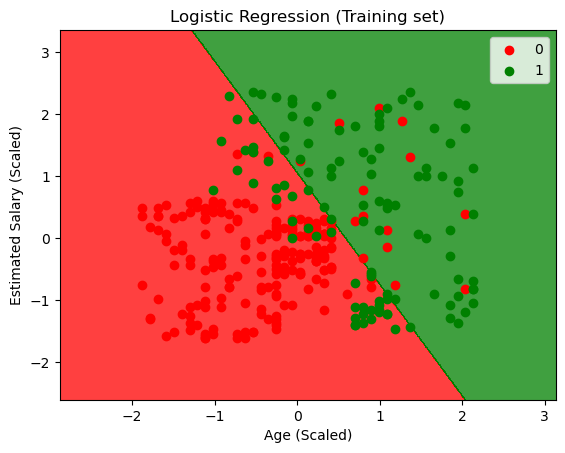

In [35]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

# Convert X_train and X_test to numpy arrays for easier plotting
X_set, y_set = X_train.values, y_train.values

# Create a mesh grid to plot the decision boundary
# Define the range for Age and EstimatedSalary
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

# Predict on the mesh grid to get the decision boundary
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel(), np.zeros(X1.ravel().shape)]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['red', 'green'])) # Fix applied here: changed ('red', 'green') to ['red', 'green']

# Set limits for the axes
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot the actual data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(['red', 'green'])(i), label = j) # Fix applied here: changed ('red', 'green') to ['red', 'green']

# Add titles and labels
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age (Scaled)')
plt.ylabel('Estimated Salary (Scaled)')
plt.legend()
plt.show()

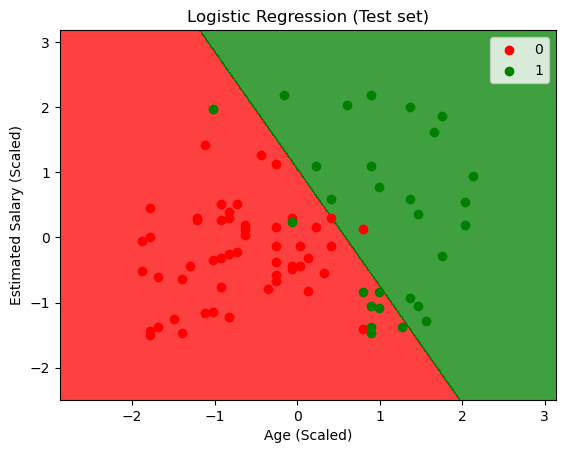

In [36]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

# Convert X_test and y_test to numpy arrays for easier plotting
X_set, y_set = X_test.values, y_test.values

# Create a mesh grid to plot the decision boundary
# Define the range for Age and EstimatedSalary
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

# Predict on the mesh grid to get the decision boundary
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel(), np.zeros(X1.ravel().shape)]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['red', 'green'])) # Fix applied here

# Set limits for the axes
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot the actual data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(['red', 'green'])(i), label = j) # Fix applied here

# Add titles and labels
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age (Scaled)')
plt.ylabel('Estimated Salary (Scaled)')
plt.legend()
plt.show()